In [4]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/uncleaned_library_books_dataset.csv")

# Step 1: Data Cleaning
df_clean = df.copy()

# Fill missing values
df_clean['Demand_Level'] = df_clean['Demand_Level'].fillna('Unknown')
df_clean['Rating'] = pd.to_numeric(df_clean['Rating'], errors='coerce')
df_clean['Rating'] = df_clean['Rating'].fillna(df_clean['Rating'].mean())
df_clean['Publication_Year'] = pd.to_numeric(df_clean['Publication_Year'], errors='coerce')
df_clean['Publication_Year'] = df_clean['Publication_Year'].fillna(2000)

# Normalize demand levels
df_clean['Demand_Level'] = df_clean['Demand_Level'].str.lower().str.strip()
df_clean['Demand_Level'] = df_clean['Demand_Level'].replace({'low': 'Low', 'medium': 'Medium', 'high': 'High', 'unknown': 'Low'})

# Step 2: Encode Demand Level
demand_score = {'Low': 1, 'Medium': 2, 'High': 3}
df_clean['Demand_Score'] = df_clean['Demand_Level'].map(demand_score)

# Step 3: Recommend books based on rules
def recommend_books(preferred_genre, min_rating=3.5):
    filtered = df_clean[
        (df_clean['Genre'] == preferred_genre) &
        (df_clean['Rating'] >= min_rating) &
        (df_clean['Demand_Score'] >= 2)
    ]

    recommended = filtered.sort_values(by=['Demand_Score', 'Borrow_Count', 'Rating'], ascending=False)
    return recommended[['Title', 'Author', 'Genre', 'Rating', 'Borrow_Count']].head(10)

# Step 4: Take input from user
user_genre = input("Enter preferred genre (e.g. Fiction, Romance, History): ")
user_min_rating = input("Enter minimum rating (default is 3.5): ")

try:
    user_min_rating = float(user_min_rating)
except:
    user_min_rating = 3.5

# Step 5: Show top recommendations
recommendations = recommend_books(user_genre, user_min_rating)

# Display results
if not recommendations.empty:
    print("\n📚 Top Recommended Books:\n")
    print(recommendations.to_string(index=False))
else:
    print("\n❌ No recommendations found. Try a different genre or lower rating.")


Enter preferred genre (e.g. Fiction, Romance, History): History
Enter minimum rating (default is 3.5): 4

📚 Top Recommended Books:

   Title   Author   Genre  Rating  Borrow_Count
Book 297 Author B History     5.0           390
Book 251 Author C History     4.5           316
Book 264 Author E History     4.5           183
 Book 25 Author B History     4.1            59
 Book 31 Author B History     4.5           158


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot bar chart for top recommended books
def plot_recommendation_bar_chart(recommendations, genre):
    plt.figure(figsize=(7, 4))
    sns.barplot(data=recommendations, x='Rating', y='Title', palette='viridis')
    plt.title(f"Top Recommended Books in Genre: {genre}", fontsize=14)
    plt.xlabel("Book Rating")
    plt.ylabel("Book Title")
    plt.tight_layout()
    plt.show()


/tmp/ipython-input-11-1644865327.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=recommendations, x='Rating', y='Title', palette='viridis')


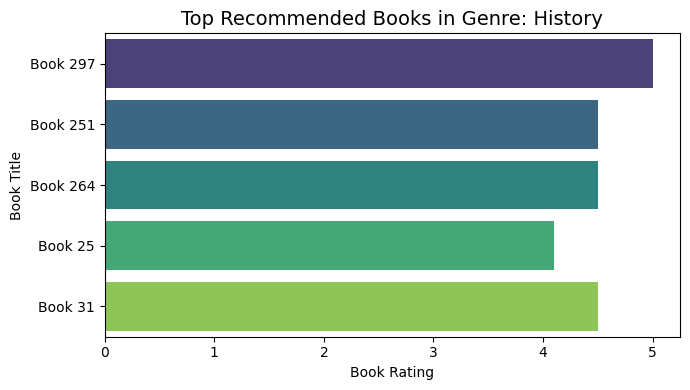

In [12]:
recommendations = recommend_books(user_genre, user_min_rating)
if not recommendations.empty:
    plot_recommendation_bar_chart(recommendations, user_genre)


In [15]:
def calculate_proxy_accuracy(df, recommendations):
    # Total number of books in that genre
    total_books = df[df['Genre'] == user_genre]
    if len(total_books) == 0:
        print("⚠️ No books found in this genre.")
        return

    # Books that meet the recommendation criteria
    matched = total_books[
        (total_books['Rating'] >= user_min_rating) &
        (total_books['Demand_Score'] >= 2)
    ]

    # Accuracy as the ratio of recommended books to possible matches
    accuracy = len(recommendations) / len(matched) if len(matched) > 0 else 0
    print(f"📊 Proxy Recommendation Accuracy: {accuracy:.2%}")


In [16]:
calculate_proxy_accuracy(df_clean, recommendations)


📊 Proxy Recommendation Accuracy: 100.00%
